In [1]:
!pip install -Uqq fastai gradio nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/

In [2]:
!pip install -q gradio

In [3]:
#!export
from fastai.vision.all import *
import gradio as gr



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/My Drive/Mastercourse/Insect Classifier

/content/drive/My Drive/Mastercourse/Insect Classifier


In [6]:
model=load_learner((f"checkpoints/models/insect-classifier-v3.pkl"))

In [7]:
insect_names=[
    'Africanized Bees',
    'Aphids',
    'Armyworms',
    'Cabbage Loopers',
    'Corn Borers',
    'Corn Earwormes',
    'Corn Rootworms',
    'Fruit Flies',
    'Potato Beetles',
    'Stink Bugs',
    'Thrips',
    'Tomato Hornworms']

def recognize_image(image):
  pred,idx,probs=model.predict(image)
  print(pred)
  return dict(zip(insect_names, map(float,probs)))


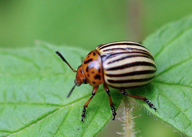

In [12]:
img=PILImage.create(f"Test Data/Test_Image_4.jpg")
img.thumbnail((192,192))
img

In [13]:
recognize_image(img)

Potato Beetles


{'Africanized Bees': 1.1063925775545158e-08,
 'Aphids': 5.351073362191983e-09,
 'Armyworms': 9.246994636669115e-08,
 'Cabbage Loopers': 1.0379090920054068e-09,
 'Corn Borers': 6.015998366137865e-08,
 'Corn Earwormes': 5.6723820307524875e-08,
 'Corn Rootworms': 3.897417002463044e-07,
 'Fruit Flies': 3.918769095889729e-07,
 'Potato Beetles': 0.999996542930603,
 'Stink Bugs': 2.3606914965057513e-06,
 'Thrips': 6.236476224330545e-09,
 'Tomato Hornworms': 6.05612058279803e-08}

In [14]:
#!pip install gradio==3.45

In [14]:
#!export
#import gradio as gr

image = gr.Image()
label = gr.Label()
examples = [
   "Test Data/Test_Image_1.jpg",
   "Test Data/Test_Image_2.jpg",
   "Test Data/Test_Image_3.jpg",
   "Test Data/Test_Image_4.jpg"]

iface = gr.Interface(fn=recognize_image, inputs=image, outputs=label,examples=examples)
iface.launch(inline=False,share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://870b536892ff2abe33.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
